<a href="https://colab.research.google.com/github/Jz8801/test/blob/main/multiclass%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)

(60000, 28, 28)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

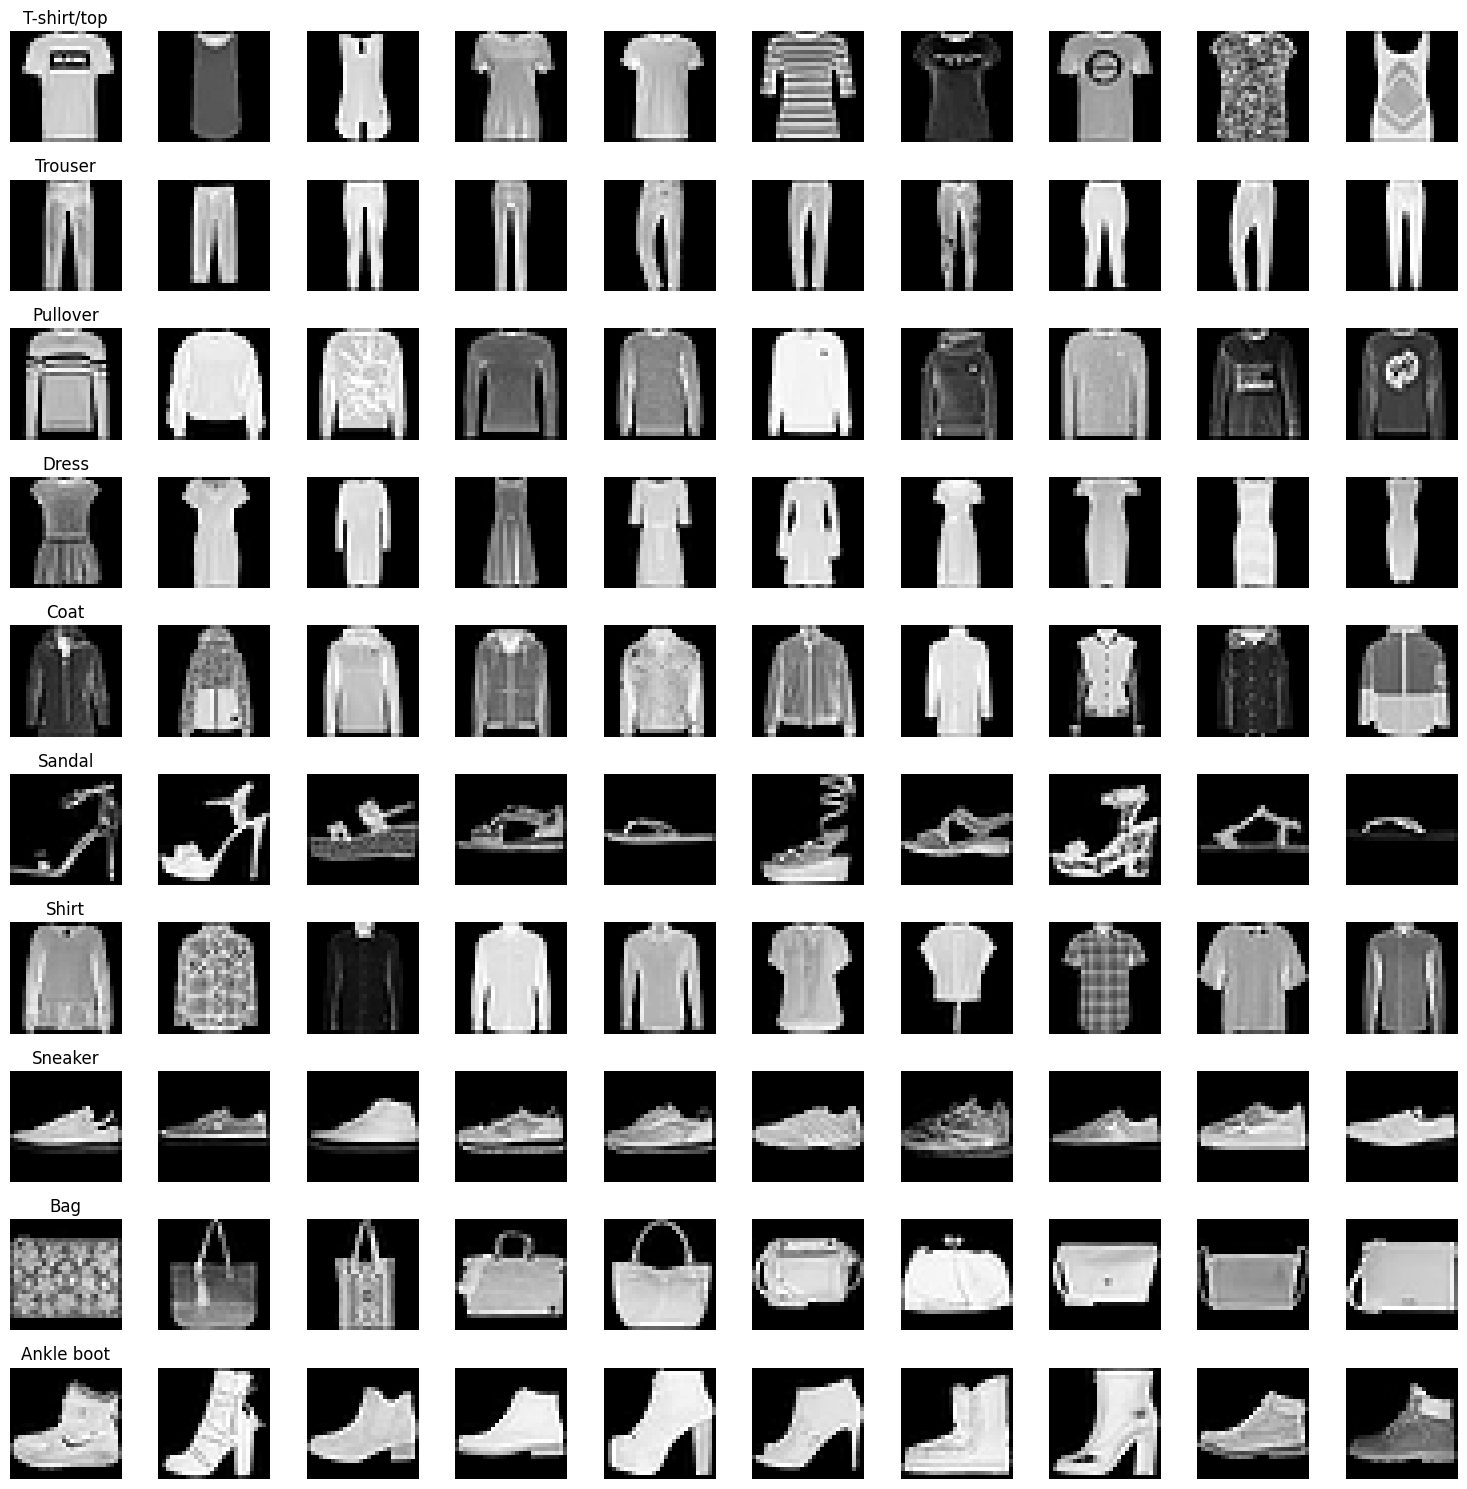

In [21]:
fig, axes = plt.subplots(10, 10, figsize=(15,15))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(10):
  indices = np.where(train_labels == i)[0]
  for j in range(10):
    ax = axes[i, j]
    ax.imshow(train_images[indices[j]], cmap = 'gray')
    ax.axis('off')
    if (j == 0):
      ax.set_title(class_names[i])

plt.tight_layout()
plt.show()

In [18]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


n_samples = len(train_images)
n_test_samples = len(test_images)
train_images_flat = train_images.reshape((n_samples, -1))
test_images_flat = test_images.reshape((n_test_samples, -1))

train_images_flat = train_images_flat / 255.0
test_images_flat = test_images_flat / 255.0

X_train, X_val, y_train, y_val = train_test_split(train_images_flat, train_labels, test_size=0.2, random_state=42)

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_predictions)
print(knn_accuracy)

0.85275


In [20]:
logi_reg = LogisticRegression(max_iter=1000)
logi_reg.fit(X_train, y_train)
logi_reg_predictions = logi_reg.predict(X_val)
logi_accuracy = accuracy_score(y_val, logi_reg_predictions)
print(logi_accuracy)

0.8500833333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

knn_best_params = knn_grid.best_params_
knn_best_score = knn_grid.best_score_

print(knn_best_params)
print(knn_best_score)

{'n_neighbors': 5}
0.8508541666666666


In [ ]:
logistic_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logistic_grid = GridSearchCV(logi_reg, logistic_params, cv=5, scoring='accuracy')
logistic_grid.fit(X_train, y_train)

logi_reg_best_params = logistic_grid.best_params_
logi_reg_best_score = logistic_grid.best_score_

print(logi_reg_best_params)
print(logi_reg_best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c